# **House Price Prediction using Machine Learning**

## 1) **Importing Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets #Using this we upload our Boston Dataset easily..
from xgboost import XGBRegressor #In xgboost modeule, we have regressor, classifier and others aswell.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

# 2) **Importing the California Housing Dataset**

In [ ]:
df = sklearn.datasets.fetch_california_housing() #Here i am using California Housing Dataset.

In [ ]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
df1 = pd.DataFrame(df.data) #So now the array dataset is converted into Dataframe.

# 3) **Analysing the Dataset**

In [ ]:
df1.head(10)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [ ]:
headers = ['MedInc','HouseAge','AveRooms','AveBedrms', 'Population','AveOccup', 'Latitude','Longitude']
df1.columns = headers #Assigning the columns to the dataframe.

In [ ]:
print(df1)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [ ]:
df1.shape #(Rows , Columns)

(20640, 8)

Now we have our Dataframe, but one thing is missing i.e. Price which is our target column. So to add it -

In [ ]:
df1['Price'] = df['target'] #This code creates a new column named 'Price' in DataFrame df1 and populates it with the values from the 'target' column in DataFrame df.

In [ ]:
df1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df1.isnull().sum() #To check if there is any NAN values that needs to be taken care of.

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [ ]:
df1.describe() #You can observe this and make assumptions with it.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# 4) **Correlation**

Understanding the dependencies of the variable with each other.

**Type of Correlation:**


1.   Positive Corr -> One value inc, other value increases
2.   Negative Corr -> One value inc, other value decreases



In [ ]:
df1.corr() #Correlation Matrix
correlation = df1.corr()
print(correlation)

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Price       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     Price  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

**To understand this Correlation, we will plot a HeatMap (Correlation Graph)**

These are parameters commonly used in seaborn's heatmap function, which is often used to visualize correlation matrices. Here's what each of them means:

**cmap = 'Blues':**

cmap stands for colormap. It specifies the color palette to be used for the heatmap.
In this case, 'Blues' indicates a sequential color palette where lower values are represented by lighter shades of blue and higher values are represented by darker shades of blue.

**cbar = True:**

cbar stands for colorbar. It determines whether to display a colorbar alongside the heatmap.
When set to True, a colorbar is shown indicating the mapping of colors to values in the heatmap.

**annot = True:**

annot stands for annotation. It determines whether to display the data values on the heatmap cells.
When set to True, the numeric values corresponding to each cell in the heatmap will be displayed.

**annot_kws = {'size': 8}:**

annot_kws stands for annotation keyword arguments. It allows customization of the annotation text properties.
In this case, {'size': 8} specifies the size of the font for the annotations. The value 8 sets the font size to 8 points.

**fmt = '.1f':**

fmt stands for format. It specifies the format string for the annotations.
In this case, '.1f' indicates a floating-point number format with one decimal place.
So, the numeric values displayed in the heatmap cells will be formatted as floating-point numbers with one decimal place.

<Figure size 1000x1000 with 0 Axes>

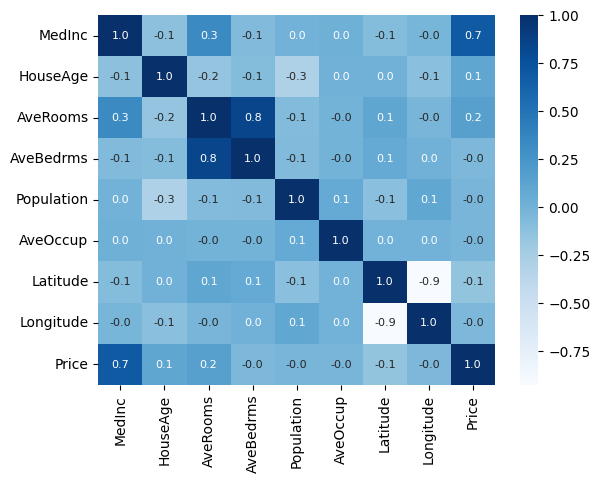

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.heatmap(correlation , cmap = 'Blues' , cbar = True , annot = True , annot_kws = {'size': 8} , fmt = '.1f' , square = False)
plt.figure(figsize = (10,10))

# 5) **Splitting the Data and Target**

In [ ]:
X = df1.drop(columns = 'Price' , axis = 1) #Independent Variable
Y = df1['Price'] #Dependent Variable or Target Variable

In [ ]:
#Checking if we Split it right
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

# 6) **Splitting the Data into Training and Testing Data**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X , Y , test_size = 0.2 ,random_state = 2)
print(x_train.shape,x_test.shape , X.shape) #Comparing the size of training, test data of X....Observe if the sum of rows of training and test data is equal to Original number of rows of X.

(16512, 8) (4128, 8) (20640, 8)


# 7) **Model Training**

**XGB Regressor**

**(A) For Training Model**

In [ ]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train) #Training the model with x_train
Yhat = xgb.predict(x_train) #Predicting the what the value would be of Y based on our training x.
score1 =  metrics.r2_score(Yhat , y_train)  #Calculating the R^2 error value.
print(score1)

0.9374761324723455


**The formula for MAE (Mean Absolute Error) is:**

MAE = (1 / n) * Σ |actual - predicted|

Calculating MAE..

In [ ]:
mae1 = metrics.mean_absolute_error(Yhat , y_train) #Calculating the error between predicted value and the actual value.
print(mae1)

0.1933648700612105


**(B) For Testing Model**

In [ ]:
xgb.fit(x_test,y_test)
Yhat1 = xgb.predict(x_test)
score2 = metrics.r2_score(Yhat1 , y_test)
print(score2)

0.9854426163007584


In [ ]:
mae2 = metrics.mean_absolute_error(Yhat1 , y_test)
print(mae2) #MAE -> The average absolute difference between Actual Value and Predicted value is 31%.

0.3108631800268186


# **8) Visualising the Difference between Predicted Value and Actual Value**

**For Training Model**

<Figure size 1000x1000 with 0 Axes>

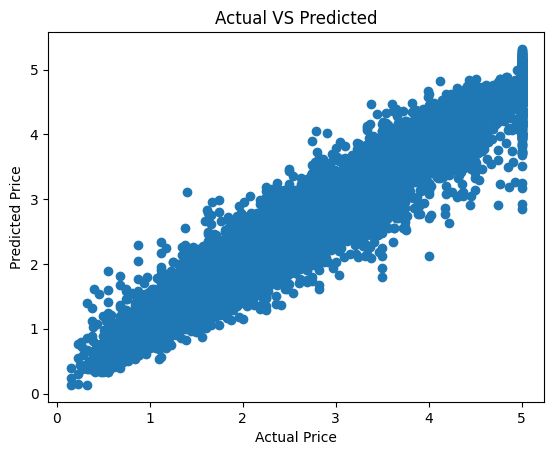

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plt.scatter (y_train , Yhat)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual VS Predicted')
plt.figure(figsize = (10,10))

When plotting a scatter graph of actual and predicted values, if all the data points are overlapping or very close to each other, it suggests that the model's predictions are very close to the actual values. In other words, the model is predicting the outcomes with high accuracy. This is a desirable scenario as it indicates that the model is effectively capturing the underlying patterns in the data and making accurate predictions.